[[5.92608696]
 [6.89565217]
 [7.86521739]]
回归系数:[[0.96956522]], 偏置项:0.11
损失函数:0.28
预测性能:0.97


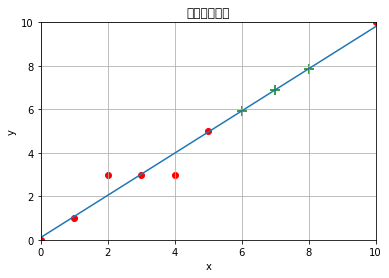

In [10]:
from sklearn import linear_model
from matplotlib import pyplot as plt
import numpy as np

def runplt():
   plt.figure()
   plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
   plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
   plt.title(u"线性回归实验")
   plt.xlabel("x")
   plt.ylabel("y")
   plt.axis([0, 10, 0, 10])
   plt.grid()

   return plt

if __name__ == "__main__":

   # from matplotlib.font_manager import _rebuild
   # _rebuild()

   plt = runplt()

   X = [[0], [1], [2], [3], [4], [5], [10]]
   y = [[0], [1], [3], [3], [3], [5], [10]]

   X_test = [[6], [7], [8]]
    
   model = linear_model.LinearRegression()
   model.fit(X, y)

   y_pred = model.predict(X_test)

   y_hat = model.predict(X)
   print(y_pred)
   print("回归系数:%s, 偏置项:%.2f" % (model.coef_, model.intercept_))
   print("损失函数:%.2f" % np.mean((model.predict(X) - y) ** 2))
   print("预测性能:%.2f" % model.score(X, y))

   plt.scatter(X, y, color='r', marker='o')
   plt.scatter(X_test, y_pred, color='g', marker='+', s=100)
   plt.plot(X, y_hat)
   plt.show()

[[12]]
预测：26.372845
R方: 1.000000
Predicted: [10.0625], Target: [11]
Predicted: [10.28125], Target: [8.5]
Predicted: [13.09375], Target: [15]
Predicted: [18.14583333], Target: [18]
Predicted: [13.3125], Target: [11]
R-squared: 0.77


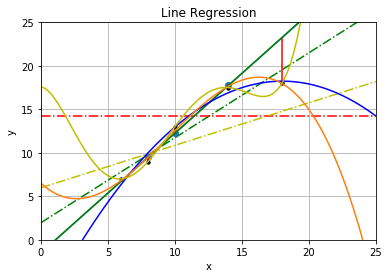

In [11]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

def runplt():
   plt.figure()
   plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
   plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
   plt.title("Line Regression")
   plt.xlabel("x")
   plt.ylabel("y")
   plt.axis([0, 25, 0, 25])
   plt.grid()
   return plt

plt = runplt()

X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

# 创建并拟合模型
model = LinearRegression()
model.fit(X, y)

# 重新模拟一组数据 让函数范围更大
X2 = [[0], [8], [10], [14], [25]]
y2 = model.predict(X2)
print(np.array([12]).reshape(-1, 1))
print('预测：%f' % model.predict(np.array([25]).reshape(-1, 1))[0])
print('R方: %f' % model.score(X2, y2))

# 其他线
y3 = [14.25, 14.25, 14.25, 14.25, 14.25]
y4 = y2 * 0.5 + 5
model.fit(X[1:-1], y[1:-1])
y5 = model.predict(X2)

# 离散点图
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-.')
plt.plot(X2, y3, 'r-.')
plt.plot(X2, y4, 'y-.')
plt.plot(X2, y5, 'o-')

# 残差预测值
yr = model.predict(X)
for idx, x in enumerate(X):
    # 实际值和预测值的距离
    plt.plot([x, x], [y[idx], yr[idx]], 'r-')

plt.plot(X, y, 'k.')
plt.plot(X2, y5, 'g-')

# 多元回归
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
print('R-squared: %.2f' % model.score(X_test, y_test))

# 多项式回归
from sklearn.preprocessing import PolynomialFeatures

X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
regressor = LinearRegression()
regressor.fit(X_train, y_train)
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'b-')

# 三项式 过拟合
cubic_featurizer = PolynomialFeatures(degree=3)
X_train_cubic = cubic_featurizer.fit_transform(X_train)
X_test_cubic = cubic_featurizer.transform(X_test)
regressor_cubic = LinearRegression()
regressor_cubic.fit(X_train_cubic, y_train)
xx_cubic = cubic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_cubic.predict(xx_cubic))

# 五项式
cubic_featurizer = PolynomialFeatures(degree=5)
X_train_cubic = cubic_featurizer.fit_transform(X_train)
X_test_cubic = cubic_featurizer.transform(X_test)
regressor_cubic = LinearRegression()
regressor_cubic.fit(X_train_cubic, y_train)
xx_cubic = cubic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_cubic.predict(xx_cubic), 'y-')

plt.show()